In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 150})
plt.rcParams['font.sans-serif'] = 'Times New Roman'
import seaborn as sns
import plotly.express as px
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib

In [2]:
data = pd.read_csv('FINAL_ARXIV_2025_with_affiliations.csv')

In [3]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,comments,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"Submitted to AAS Journals. 10 pages, 4 figures...","ApJ (2025), 980 183",0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1,"['Astronomers', 'Astronomical evolution', 'Ast...","['Galaxies (573)', 'Astronomy image processing..."
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,"19 pages, 12 figures, accepted for publication...",NaN,0,NaN,0.0,0.0,1,1,"['Accretion', 'Angular distance', 'Bayesian st...",['powered by accretion of matter from a compan...
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,Accepted for publication in IEEE Transactions ...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[]
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,Proceeding presented at the 8th Heidelberg Int...,NaN,0,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['Cosmic Rays 1', 'HII regions', 'Gamma rays',..."
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,"19 pages, 12 figures, ApJ accepted",NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['galaxies: rotation curve - galaxies: fundame...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18331,Systematic search of laser and phase modulatio...,Heterodyne interferometry for precision scienc...,"['Kohei Yamamoto', 'Olaf Hartwig', 'Lennart Wi...",8.0,24.0,0.0,arxiv.org/pdf/2512.17802,Instrumentation and Methods for Astrophysics,"['Applied Physics', 'Optics']",NaN,...,NaN,NaN,0,NaN,0.0,0.0,0,0,"['Gravitational wave detectors', 'Heterodyne i...",[]
18332,Investigating the AGN variability timescale --...,Active galactic nuclei (AGNs) exhibit variabil...,"['Adrien Hélias', 'Sarah C. Gallagher', 'Pauli...",13.0,16.0,1.0,arxiv.org/pdf/2512.17811,Astrophysics of Galaxies,NaN,NaN,...,"16 pages, 13 figures, accepted for publication...",NaN,0,NaN,0.0,0.0,1,1,"['AGN', 'AGNs', 'Active galactic nuclei']",['Active galactic nuclei (16) - Light curves (...
18333,Constraining primordial non-Gaussianity from D...,We present the first measurement of local-type...,"['Sofia Chiarenza', 'Alex Krolewski', 'Marco B...",17.0,42.0,11.0,arxiv.org/pdf/2512.17865,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,"42 pages, 17 figures, 11 tables. Comments are ...",NaN,0,NaN,0.0,0.0,0,0,"['CMB', 'Dark energy', 'Fitting']",['cosmological parameters from LSS – power spe...
18334,On the complex nature of coronal heating,A large part of the hot corona consists of mag...,"['C.A. Breu', 'D.I. Pontin', 'E. Priest', 'I. ...",18.0,18.0,2.0,arxiv.org/pdf/2512.17880,Solar and Stellar Astrophysics,NaN,NaN,...,"18 pages, 18 figures",NaN,0,"Breu, C. A.: School of Mathematics and Statist...",0.0,0.0,0,0,"['Cooling fl

In [41]:
# Cross-check pages and figures from comments
# Percentage of mismatches
total_entries = len(data)
mismatches = 0
for i in range(len(data)):
    if isinstance(data.at[i, 'comments'], str):
        if 'pages' in data.at[i, 'comments'].lower():
            try:
                pages_part = data.at[i, 'comments'].lower().split('pages')[0]
                pages_str = pages_part.split()[-1]
                pages_str = pages_str.replace(',', '').replace('.', '').replace('(', '').replace(')', '')
                pages_str = int(pages_str)
                predicted_pages = data.at[i, 'pages']
                if int(pages_str) != predicted_pages:
                    mismatches += 1
            except:
                pass
        if 'figures' in data.at[i, 'comments'].lower():
            try:
                figures_part = data.at[i, 'comments'].lower().split('figures')[0]
                figures_str = figures_part.split()[-1]
                figures_str = figures_str.replace(',', '').replace('.', '').replace('(', '').replace(')', '')
                figures_str = int(figures_str)
                predicted_figures = data.at[i, 'figures']
                if int(figures_str) != predicted_figures:
                    mismatches += 1
            except:
                pass
        if 'tables' in data.at[i, 'comments'].lower():
            try:
                tables_part = data.at[i, 'comments'].lower().split('tables')[0]
                tables_str = tables_part.split()[-1]
                tables_str = tables_str.replace(',', '').replace('.', '').replace('(', '').replace(')', '')
                tables_str = int(tables_str)
                predicted_tables = data.at[i, 'tables']
                if int(tables_str) != predicted_tables:
                    mismatches += 1
            except:
                pass

mismatch_percentage = (mismatches / total_entries) * 100
print(f"Total entries: {total_entries}")
print(f"Mismatches found: {mismatches}")
print(f"Mismatch percentage: {mismatch_percentage:.2f}%")

Total entries: 18336
Mismatches found: 2352
Mismatch percentage: 12.83%


In [ ]:
# Un-naturally large page or figure counts
# Percemtage of entries with large counts
large_counts = 0
for i in range(len(data)):
    # if data.at[i, 'pages'] > 100:
    #     print(f"Un-naturally large page count for paper {data['pdf_link'][i]}: {data.at[i, 'pages']} pages")
    #     # corrected_pages = input("Enter corrected page count (or press Enter to skip): ")
    #     # if corrected_pages.isdigit():
    #     #     data.at[i, 'pages'] = int(corrected_pages)
    #     large_counts += 1
    if data.at[i, 'figures'] > 50:
        print(f"Un-naturally large figure count at index {data['pdf_link'][i]}: {data.at[i, 'figures']} figures")
        # corrected_figures = input("Enter corrected figure count (or press Enter to skip): ")
        # if corrected_figures.isdigit():
        #     data.at[i, 'figures'] = int(corrected_figures)
        large_counts += 1
    if data.at[i, 'tables'] > 20:
        print(f"Un-naturally large table count at index {data['pdf_link'][i]}: {data.at[i, 'tables']} tables")
        # corrected_tables = input("Enter corrected table count (or press Enter to skip): ")
        #   if corrected_tables.isdigit():
        #     data.at[i, 'tables'] = int(corrected_tables)
        large_counts += 1

large_counts_percentage = (large_counts / total_entries) * 100
print(f"Total entries: {total_entries}")
print(f"Entries with large counts corrected: {large_counts}")
print(f"Large counts percentage: {large_counts_percentage:.2f}%")

In [ ]:
data

In [ ]:
# Un-naturally large page or figure counts
# Percemtage of entries with large counts
large_counts = 0
for i in range(len(data)):
    if data.at[i, 'pages'] > 100:
        if data.at[i, 'num_checks'] == 0:
            print(f"Un-naturally large page count for paper {data['pdf_link'][i]}: {data.at[i, 'pages']} pages")
            title = data.at[i, 'title']
            corrected_pages = input(str(title) + " : Current index " + str(i) + " ")
            if corrected_pages.isdigit():
                data.at[i, 'pages'] = int(corrected_pages)
                large_counts += 1
                data.at[i, 'num_checks'] += 1
    if data.at[i, 'figures'] > 50:
        if data.at[i, 'num_checks'] == 0:
            print(f"Un-naturally large figure count at index {data['pdf_link'][i]}: {data.at[i, 'figures']} figures")
            title = data.at[i, 'title']
            corrected_figures = input(str(title) + " : Current index " + str(i) + " ")
            if corrected_figures.isdigit():
                data.at[i, 'figures'] = int(corrected_figures)
                large_counts += 1
                data.at[i, 'num_checks'] += 1
    if data.at[i, 'tables'] > 20:
        if data.at[i, 'num_checks'] == 0:
            print(f"Un-naturally large table count at index {data['pdf_link'][i]}: {data.at[i, 'tables']} tables")
            title = data.at[i, 'title']
            corrected_tables = input(str(title) + " : Current index " + str(i) + " ")
            if corrected_tables.isdigit():
                data.at[i, 'tables'] = int(corrected_tables)
                large_counts += 1
                data.at[i, 'num_checks'] += 1

large_counts_percentage = (large_counts / total_entries) * 100
print(f"Total entries: {total_entries}")
print(f"Entries with large counts corrected: {large_counts}")

In [31]:
# Count the number of times the words 'submitted' or 'journal' or 'published' or 'accepted' appears in comments
counter = 0
for i in range(len(data)):
    if data['published_journal'][i] is not None and isinstance(data['published_journal'][i], str):
        continue
    if isinstance(data.at[i, 'comments'], str):
        comments_lower = data.at[i, 'comments'].lower()
        if 'published' in comments_lower or 'accepted' in comments_lower:
            print(f"Publication info found in comments for index {i}: {data.at[i, 'comments']}")
            counter += 1

print(f"Total papers with publication info in comments: {counter}")


Publication info found in comments for index 1: 19 pages, 12 figures, accepted for publication in MNRAS
Publication info found in comments for index 2: Accepted for publication in IEEE Transactions on Applied Superconductivity for ASC2024 special issue
Publication info found in comments for index 4: 19 pages, 12 figures, ApJ accepted
Publication info found in comments for index 8: 5 pages + appendix, accepted by MNRAS
Publication info found in comments for index 9: Accepted to appear in the Proceedings of the 17th Marcel Grossmann Meeting (MG17)/Pescara, Italy, 7-12 July 2024
Publication info found in comments for index 11: 16 pages, 18 figures, accepted for publication in Astronomy & Astrophysics
Publication info found in comments for index 14: 19 pages, 15 figures; Accepted for the publication in The Astrophysical Journal (ApJ)
Publication info found in comments for index 16: 13 pages, 13 figures, accepted for publication in PASJ
Publication info found in comments for index 17: 13 pa

In [47]:
# Set all rows with 'arxiv e-prints' to NaN in journals column
for i in range(len(data)):
    if isinstance(data.at[i, 'journals'], str):
        if data.at[i, 'journals'] == 'arXiv e-prints':
            data.at[i, 'journals'] = np.nan

In [48]:
# Published Journal Flagging
data['journal_flag'] = data['published_journal'].notnull().astype(int)
data

# Update journal_flag based on comments
for i in range(len(data)):
    if data['journal_flag'][i] == 1:
        continue
    if isinstance(data.at[i, 'comments'], str):
        comments_lower = data.at[i, 'comments'].lower()
        if 'published' in comments_lower or 'accepted' in comments_lower:
            data.at[i, 'journal_flag'] = 1

# Update journal_flag based on journals column from submitted_journals.py
for i in range(len(data)):
    if data['journal_flag'][i] == 1:
        continue
    if isinstance(data.at[i, 'journals'], str):
        data.at[i, 'journal_flag'] = 1

# # Final published journal
# data['published_journal_final'] = data.apply(lambda row: row['published_journal'] if pd.notnull(row['published_journal']) else (row['journals'] if pd.notnull(row['journals']) else None), axis=1)
# data

In [43]:
# Count number of times the word 'submitted' appears in comments
counter = 0
for i in range(len(data)):
    if isinstance(data.at[i, 'comments'], str):
        comments_lower = data.at[i, 'comments'].lower()
        if 'submitted' in comments_lower:
            print(f"'Submitted' found in comments for index {i}: {data.at[i, 'comments']}")
            counter += 1
print(f"Total papers with 'submitted' in comments: {counter}")

'Submitted' found in comments for index 0: Submitted to AAS Journals. 10 pages, 4 figures, 2 tables
'Submitted' found in comments for index 20: 10 pages, 11 figures, to be submitted to MNRAS, comments are welcome
'Submitted' found in comments for index 40: 9 pages, 1 figure. Submitted as proceeding for the FRAPWS24 (PoS-Sissa)
'Submitted' found in comments for index 46: 12 pages, 24 figures, submitted to JAAVSO
'Submitted' found in comments for index 114: 20 pages, 8 figures. Submitted to the Open Journal of Astrophysics
'Submitted' found in comments for index 120: Submitted to MNRAS (23 January 2025)
'Submitted' found in comments for index 121: Submitted to ApJ, 12 pages, 8 figures
'Submitted' found in comments for index 122: 9 pages, 6 figures, submitted to MNRAS, shared first authorship between A. Bohl, L. Lawrence, and G. Lowry, data will be available on zenodo upon publication
'Submitted' found in comments for index 141: 8 Figures, submitted to ApJ
'Submitted' found in comments fo

In [44]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,keywords,date,comments,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"['Galaxies (573)', 'Astronomy image processing...",2025-01-01,"Submitted to AAS Journals. 10 pages, 4 figures...","ApJ (2025), 980 183",0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,['powered by accretion of matter from a compan...,2025-01-01,"19 pages, 12 figures, accepted for publication...",NaN,0,NaN,0.0,0.0,1,1
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,[],2025-01-01,Accepted for publication in IEEE Transactions ...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,"['Cosmic Rays 1', 'HII regions', 'Gamma rays',...",2025-01-01,Proceeding presented at the 8th Heidelberg Int...,NaN,0,NaN,0.0,0.0,0,0
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,['galaxies: rotation curve - galaxies: fundame...,2025-01-01,"19 pages, 12 figures, ApJ accepted",NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18331,Systematic search of laser and phase modulatio...,Heterodyne interferometry for precision scienc...,"['Kohei Yamamoto', 'Olaf Hartwig', 'Lennart Wi...",8.0,24.0,0.0,arxiv.org/pdf/2512.17802,Instrumentation and Methods for Astrophysics,"['Applied Physics', 'Optics']",NaN,...,[],2025-12-22,NaN,NaN,0,NaN,0.0,0.0,0,0
18332,Investigating the AGN variability timescale --...,Active galactic nuclei (AGNs) exhibit variabil...,"['Adrien Hélias', 'Sarah C. Gallagher', 'Pauli...",13.0,16.0,1.0,arxiv.org/pdf/2512.17811,Astrophysics of Galaxies,NaN,NaN,...,['Active galactic nuclei (16) - Light curves (...,2025-12-22,"16 pages, 13 figures, accepted for publication...",NaN,0,NaN,0.0,0.0,1,1
18333,Constraining primordial non-Gaussianity from D...,We present the first measurement of local-type...,"['Sofia Chiarenza', 'Alex Krolewski', 'Marco B...",17.0,42.0,11.0,arxiv.org/pdf/2512.17865,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,['cosmological parameters from LSS – power spe...,2025-12-22,"42 pages, 17 figures, 11 tables. Comments are ...",NaN,0,NaN,0.0,0.0,0,0
18334,On the complex nature of coronal heating,A large part of the hot corona consists of mag...,"['C.A. Breu', 'D.I. Pontin', 'E. Priest', 'I. ...",18.0,18.0,2.0,arxiv.org/pdf/2512.17880,Solar and Stellar Astrophysics,NaN,NaN,...,['Sun:corona – Sun:magnetic fields 1 INTRODUCT...,2025-12-22,"18 pages, 18 figures",NaN,0,"Breu, C. A.: School of Mathematics and Statist...",0.0,0.0,0,0


In [45]:
# Percentage of Journals from journal_flag
journal_counts = data['journal_flag'].value_counts(normalize=True) * 100
journal_counts

print("Percentage of papers with published journals:", journal_counts.get(1, 0))

data['journal_flag_with_submitted'] = data['journal_flag']
# Assume all submitted journals are published
for i in range(len(data)):
    if data['journal_flag'][i] == 0:
        if 'submitted' in str(data.at[i, 'comments']).lower():
            data.at[i, 'journal_flag_with_submitted'] = 1

# Percentage of Journals from journal_flag_with_submitted
journal_counts_with_submitted = data['journal_flag_with_submitted'].value_counts(normalize=True) * 100
journal_counts_with_submitted

print("Percentage of papers with published journals (including submitted):", journal_counts_with_submitted.get(1, 0))

Percentage of papers with published journals: 76.09075043630017
Percentage of papers with published journals (including submitted): 82.38983420593368


In [46]:
# Missmatch between journal_flags and citations
mismatch_count = 0

for i in range(len(data)):
    if data['journal_flag'][i] == 0 and data['total_citations'][i] > 0:
        print(f"Mismatch found for paper - {data['title'][i]} : journal_flag = {data['journal_flag'][i]}, total_citations = {data['total_citations'][i]}")
        mismatch_count += 1

print(f"Total mismatches between journal_flag and citations: {mismatch_count}")

Total mismatches between journal_flag and citations: 0


In [ ]:
# Standardizing journal names
# Accounting for shortened or alternative journal names

# shortened_journal_names = {
#     'ApJ': 'The Astrophysical Journal',
#     'ApJL': 'The Astrophysical Journal Letters',
#     'ApJS': 'The Astrophysical Journal Supplement Series',
#     'MNRAS': 'Monthly Notices of the Royal Astronomical Society',
#     'A&A': 'Astronomy & Astrophysics',
#     'AAS': 'American Astronomical Society',
#     'AJ': 'The Astronomical Journal',
#     'PASP': 'Publications of the Astronomical Society of the Pacific',
#     'Nature Astronomy': 'Nature Astronomy',
#     'Science': 'Science',
#     'PRD': 'Physical Review D',
#     'PRL': 'Physical Review Letters',
#     'JOSS': 'The Journal of Open Source Software',
#     'PASA': 'Publications of the Astronomical Society of Australia',
#     'IEEE': 'Institute of Electrical and Electronics Engineers',
#     'JHEP': 'Journal of High Energy Physics',
#     'JAA': 'Journal of Astrophysics and Astronomy',
#     'RAA': 'Research in Astronomy and Astrophysics',
#     'Phys Rev D': 'Physical Review D',
#     'PASJ': 'Publications of the Astronomical Society of Japan',
#     'RMxAA': 'Revista Mexicana de Astronomía y Astrofísica',
#     'OJA': 'The Open Journal of Astrophysics',
#     'Astrophysical Bulletin': 'Astrophysical Bulletin',
#     'AJP': 'American Journal of Physics',
#     'A&A': 'Astronomy and Astrophysics',
#     'New Astronmy': 'New Astronomy',
#     'JCAP': 'Journal of Cosmology and Astroparticle Physics',
#     'MNRAS Letters': 'Monthly Notices of the Royal Astronomical Society Letters',
#     'GAFD': 'Geophysical and Astrophysical Fluid Dynamics',
#     'Solar Physics': 'Solar Physics',
#     'Symmetry': 'Symmetry',
#     'RNAAS': 'Research Notes of the American Astronomical Society'
# }

journal_map = {
    # Astronomy & Astrophysics
    "Astronomy & Astrophysics": "A&A",
    "Astronomy and Astrophysics": "A&A",
    "Astronomy and Astrophysis": "A&A", # Handling typo found in text
    "A&A": "A&A",
    "Astron. Astrophys.": "A&A",
    "Astronomy & Astrophysics Letters": "A&A", # Often cited as just A&A or A&AL
    "A&A Letters": "A&A",
    "A&A Letter": "A&A",

    # American Astronomical Society Journals
    "American Astronomical Society": "AAS",
    "AAS": "AAS",
    "AAS Journals": "AAS",
    "AAS Journal": "AAS",
    "AAS Main Journal": "AAS",
    "AAS Letters": "AASL",
    "AASL": "AASL",
    
    # The Astrophysical Journal (Main)
    "The Astrophysical Journal": "ApJ",
    "Astrophysical Journal": "ApJ",
    "ApJ": "ApJ",
    "Ap.J.": "ApJ",
    
    # The Astrophysical Journal Letters
    "The Astrophysical Journal Letters": "ApJL",
    "Astrophysical Journal Letters": "ApJL",
    "ApJ Letters": "ApJL",
    "ApJ Lett": "ApJL",
    "ApJL": "ApJL",
    
    # The Astrophysical Journal Supplement Series
    "The Astrophysical Journal Supplement Series": "ApJS",
    "The Astrophysical Journal Supplement": "ApJS",
    "Astrophysical Journal Supplement": "ApJS",
    "ApJ Supplement": "ApJS",
    "ApJS": "ApJS",
    
    # The Astronomical Journal
    "The Astronomical Journal": "AJ",
    "Astronomical Journal": "AJ",
    "AJ": "AJ",
    
    # Monthly Notices of the Royal Astronomical Society
    "Monthly Notices of the Royal Astronomical Society": "MNRAS",
    "Monthly Notices of Royal Astronomical Society": "MNRAS",
    "MNRAS": "MNRAS",
    "MNRAS Main Journal": "MNRAS",
    "Monthly Notices of the Royal Astronomical Society Letters": "MNRASL",
    "MNRAS Letters": "MNRASL",
    
    # Physical Review
    "Physical Review D": "PRD",
    "Phys. Rev. D": "PRD",
    "PRD": "PRD",
    "Physical Review Letters": "PRL",
    "Phys. Rev. Lett.": "PRL",
    "PRL": "PRL",
    "Physical Review C": "PRC",
    "PRC": "PRC",
    "Physical Review E": "PRE",
    "Phys. Rev. E": "PRE",
    
    # Cosmology & Astroparticle
    "Journal of Cosmology and Astroparticle Physics": "JCAP",
    "JCAP": "JCAP",
    "Astroparticle Physics": "APh",
    
    # Pacific / Japan / Australia / China
    "Publications of the Astronomical Society of the Pacific": "PASP",
    "PASP": "PASP",
    "Publications of the Astronomical Society of Japan": "PASJ",
    "PASJ": "PASJ",
    "Publications of the Astronomical Society of Australia": "PASA",
    "PASA": "PASA",
    "Research in Astronomy and Astrophysics": "RAA",
    "RAA": "RAA",
    "Science China Physics, Mechanics & Astronomy": "SCPMA",
    "SCPMA": "SCPMA",
    "Chinese Physics C": "ChPhC",
    
    # New / Open Journals
    "The Open Journal of Astrophysics": "OJAp",
    "Open Journal of Astrophysics": "OJAp",
    "OJAp": "OJAp",
    "OJA": "OJAp",
    "The Planetary Science Journal": "PSJ",
    "Planetary Science Journal": "PSJ",
    "PSJ": "PSJ",
    "Research Notes of the AAS": "RNAAS",
    "Research Notes of the American Astronomical Society": "RNAAS",
    "RNAAS": "RNAAS",
    
    # High Energy / Instrumentation
    "Journal of High Energy Astrophysics": "JHEAP",
    "JHEAp": "JHEAP",
    "JHEAP": "JHEAP",
    "Journal of Astronomical Telescopes, Instruments, and Systems": "JATIS",
    "JATIS": "JATIS",
    "RAS Techniques and Instruments": "RASTI",
    "RASTI": "RASTI",
    "Journal of Instrumentation": "JINST",
    "JINST": "JINST",
    "Nuclear Instruments and Methods in Physics Research A": "NIMPA",
    "NIMA": "NIMPA",
    
    # Other Major Journals
    "Nature": "Nature",
    "Nature Astronomy": "NatAs",
    "Nature Communications": "NatCo",
    "Science": "Science",
    "Science Advances": "SciAv",
    "Solar Physics": "SoPh",
    "Icarus": "Icarus",
    "New Astronomy": "NewA",
    "New Astronomy Reviews": "NewAR",
    "Astronomische Nachrichten": "AN",
    "Astronomical Notes": "AN",
    "Astrophysics and Space Science": "Ap&SS",
    "Ap&SS": "Ap&SS",
    "Universe": "Univ",
    "Galaxies": "Galax",
    "Symmetry": "Symm",
    "Physics of the Dark Universe": "PDU",
    "Journal of Astrophysics and Astronomy": "JApA",
    "JoAA": "JApA",
    "Revista Mexicana de Astronomía y Astrofísica": "RMxAA",
    "RevMexAA": "RMxAA",
    "Experimental Astronomy": "ExpA",
    "Astronomy and Computing": "A&C",
    "Astronomy & Computing": "A&C",
    "Advances in Space Research": "AdSpR",
    "Journal of Open Source Software": "JOSS",
    "JOSS": "JOSS"
}

for i in range(len(data)):
    # Standardize existing journal names if they are in the map
    if data.at[i, 'published_journal'] in journal_map:
        data.at[i, 'published_journal'] = journal_map[data.at[i, 'published_journal']]

    # Check comments for journal names to fill or update
    if isinstance(data.at[i, 'comments'], str):
        comment_lower = data.at[i, 'comments'].lower()
        for key, short_name in journal_map.items():
            if key.lower() in comment_lower:
                data.at[i, 'published_journal'] = short_name

In [ ]:
# Count number of journal names after standardization
print(data['published_journal'].notna().sum())

In [ ]:
# Plotting percentage of papers published in each journal
journal_counts = data['published_journal'].value_counts(normalize=True).head(25) * 100
plt.figure(figsize=(10, 8))
plt.barh(journal_counts.index, journal_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(journal_counts))))
plt.xlabel('Percentage of Papers (%)')
plt.ylabel('Journal')
plt.title('Percentage of Papers Published in Each Journal (Top 15)')
plt.gca().invert_yaxis()
plt.show()

In [4]:
list_of_telescopes = [
    'HST',
    'Chandra',
    'Spitzer',
    'JWST',
    'VLT',
    'ALMA',
    'Keck',
    'Subaru',
    'Euclid',
    'Vera C. Rubin Observatory',
    'SDSS',
    'GAIA',
    'ZWICKY',
    'LIGO',
    'LISA',
    'Fermi',
    'Swift',
    'TESS',
    'NICER',
    'NuSTAR',
    'XMM-Newton',
    'INTEGRAL',
    'SPHEREx',
    'SVOM',
    'AstroSat',
    'HXMT',
    'XRISM',
    'Einstein Probe',
    'IXPE',
    'XPoSat',
    'IRIS',
    'CUTE',
    'GLIDE',
    'NEOSSat',
    'CHEOPS',
    'DAMPE',
    'CALCET',
    'LSST',
]

long_names = {
    'HST': 'Hubble Space Telescope',
    'JWST': 'James Webb Space Telescope',
    'VLT': 'Very Large Telescope',
    'ALMA': 'Atacama Large Millimeter/submillimeter Array',
    'SDSS': 'Sloan Digital Sky Survey',
    'LIGO': 'Laser Interferometer Gravitational-Wave Observatory',
    'LISA': 'Laser Interferometer Space Antenna',
    'ZWICKY': 'Zwicky Transient Facility',
    'Chandra': 'Chandra X-ray Observatory',
    'Spitzer': 'Spitzer Space Telescope',
    'Fermi': 'Fermi Gamma-ray Space Telescope',
    'Swift': 'Neil Gehrels Swift Observatory',
    'TESS': 'Transiting Exoplanet Survey Satellite',
    'NICER': 'Neutron star Interior Composition Explorer',
    'GAIA': 'Global Astrometric Interferometer for Astrophysics',
    'NuSTAR': 'Nuclear Spectroscopic Telescope Array',
    'XMM-Newton': 'X-ray Multi-Mirror Mission - Newton',
    'INTEGRAL': 'INTErnational Gamma-Ray Astrophysics Laboratory',
    'SPHEREx': 'Spectro-Photometer for the History of the Universe, Epoch of Reionization, and Ices Explorer',
    'SVOM': 'Space-based multi-band astronomical Variable Objects Monitor',
    'AstroSat': 'AstroSat Space Observatory',
    'HXMT': 'Hard X-ray Modulation Telescope',
    'XRISM': 'X-ray Imaging and Spectroscopy Mission',
    'Einstein Probe': 'Einstein Probe X-ray Observatory',
    'IXPE': 'Imaging X-ray Polarimetry Explorer',
    'XPoSat': 'X-ray Polarimeter Satellite',
    'IRIS': 'Interface Region Imaging Spectrograph',
    'CUTE': 'Colorado Ultraviolet Transit Experiment',
    'GLIDE': 'Carruthers Geocorona Observatory',
    'NEOSSat': 'Near-Earth Object Surveillance Satellite',
    'CHEOPS': 'Characterising Exoplanet Satellite',
    'DAMPE': 'DArk Matter Particle Explorer',
    'CALCET': 'CALorimetric Electron Telescope',
    'RST': 'Roman Space Telescope',
    'RST': 'Nancy Grace Roman Space Telescope',
    'Vera Rubin': 'Vera C. Rubin Observatory',
    'Rubin': 'Vera C. Rubin Observatory',
    'Vera Rubin': 'LSST',
    'Vera Rubin': 'Legacy Survey of Space and Time',
}

data['telescope'] = np.nan

for i in range(len(data)):
    if isinstance(data.at[i, 'title'], str):
        for telescope in list_of_telescopes:
            if telescope.lower() in data.at[i, 'title'].lower():
                # Assign the short form (telescope) directly
                data.at[i, 'telescope'] = telescope
    if isinstance(data.at[i, 'abstract'], str):
        for telescope in list_of_telescopes:
            if telescope.lower() in data.at[i, 'abstract'].lower():
                data.at[i, 'telescope'] = telescope

In [5]:
mask = data['telescope'].notna()
masked_data = data[mask]
masked_data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2,telescope
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[],INTEGRAL
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['Cosmic Rays 1', 'HII regions', 'Gamma rays',...",Fermi
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['galaxies: rotation curve - galaxies: fundame...,ALMA
9,IXPE observations of supernova remnants,Supernova remnants (SNRs) are among the most i...,['Riccardo Ferrazzoli'],9.0,14.0,1.0,arxiv.org/pdf/2501.12719,High Energy Astrophysical Phenomena,NaN,appear in the Proceedings of the 17th Marcel G...,...,NaN,0,"Ferrazzoli, Riccardo: INAF",0.0,0.0,1,1,"['Cosmic ray objects', 'Cosmic ray sources', '...",[],IXPE
15,On the equivalence between galaxy angular corr...,We investigate the angular power spectrum ($C_...,"['Ryo Terasawa', 'Yue Nan', 'Masahiro Takada']",4.0,9.0,0.0,arxiv.org/pdf/2501.12661,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Field galaxies', 'Galaxies', 'High-redshift ...",[],INTEGRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18322,Evolving and interacting dark energy: photomet...,We investigate the Dark Scattering (DS) intera...,"['M. Tsedrik', 'B. Bose']",6.0,9.0,2.0,arxiv.org/pdf/2512.17684,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['CMB', 'Cosmological models', 'Cosmological p...",['cosmology: theory – cosmology: dark energy –...,Euclid
18326,Interpreting the strong clustering of ultra-di...,We use the IllustrisTNG300-ODM simulation to i...,"['Qinglin Ma', 'Cheng Li', 'Yangyao Chen', 'Ho...",8.0,11.0,0.0,arxiv.org/pdf/2512.17742,Astrophysics of Galaxies,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,1,"['A dwarfs', 'B dwarfs', 'Clustering']",['galaxies: evolution – galaxies: formation – ...,SDSS
18330,Selected topics on: 1) proposal of interpretin...,As the fiftieth anniversary of our common effo...,"['R. Ruffini', 'C. Sigismondi', 'Y. Wang', 'J....",35.0,46.0,1.0,arxiv.org/pdf/2512.17787,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Dark energy', 'Dark matter', 'Field of view']",['Compact objects'],Fermi
18331,Systematic search of laser and phase modulatio...,Heterodyne interferometry for precision scienc...,"['Kohei Yamamoto', 'Olaf Hartwig', 'Lennart Wi...",8.0,24.0,0.0,arxiv.org/pdf/2512.17802,Instrumentation and Methods for Astrophysics,"['Applied Physics', 'Optics']",NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Gravitational wave detectors', 'Heterodyne i...",[],LISA


In [6]:
# Top 10 telescope counts
telescope_counts = masked_data['telescope'].value_counts().head(10)
print(telescope_counts)

telescope
JWST          1044
GAIA           742
ALMA           535
TESS           491
INTEGRAL       367
Fermi          348
SDSS           307
LISA           259
LSST           241
XMM-Newton     222
Name: count, dtype: int64


In [6]:
# Loading jpeg
from PIL import Image
jwst_img = Image.open('Images/james-webb-space-telescope-graphic-illustration-astronomy-vector.jpg')
gaia_img = Image.open('Images/images.jpeg')
alma_img = Image.open('Images/alma-features.png')
tess_img = Image.open('Images/tess-telescope.png')
integral_img = Image.open('Images/INTEGRAL_spacecraft_model.png')
fermi_img = Image.open('Images/Fermi_Gamma-ray_Space_Telescope_spacecraft_model.png')
sdss_img = Image.open('Images/SDSS_telescope.png')
lisa_img = Image.open('Images/Lisa_logo-mission-patch-1024x1024.jpg')
lsst_img = Image.open('Images/Large_Synoptic_Survey_Telescope_3_4_render_2013.png')
newton_img = Image.open('Images/XMM-Newton_spacecraft_model.png')

image_list = {
    'JWST': jwst_img,
    'GAIA': gaia_img,
    'ALMA': alma_img,
    'TESS': tess_img,
    'INTEGRAL': integral_img,
    'Fermi': fermi_img,
    'SDSS': sdss_img,
    'LISA': lisa_img,
    'LSST': lsst_img,
    'XMM-Newton': newton_img,
}

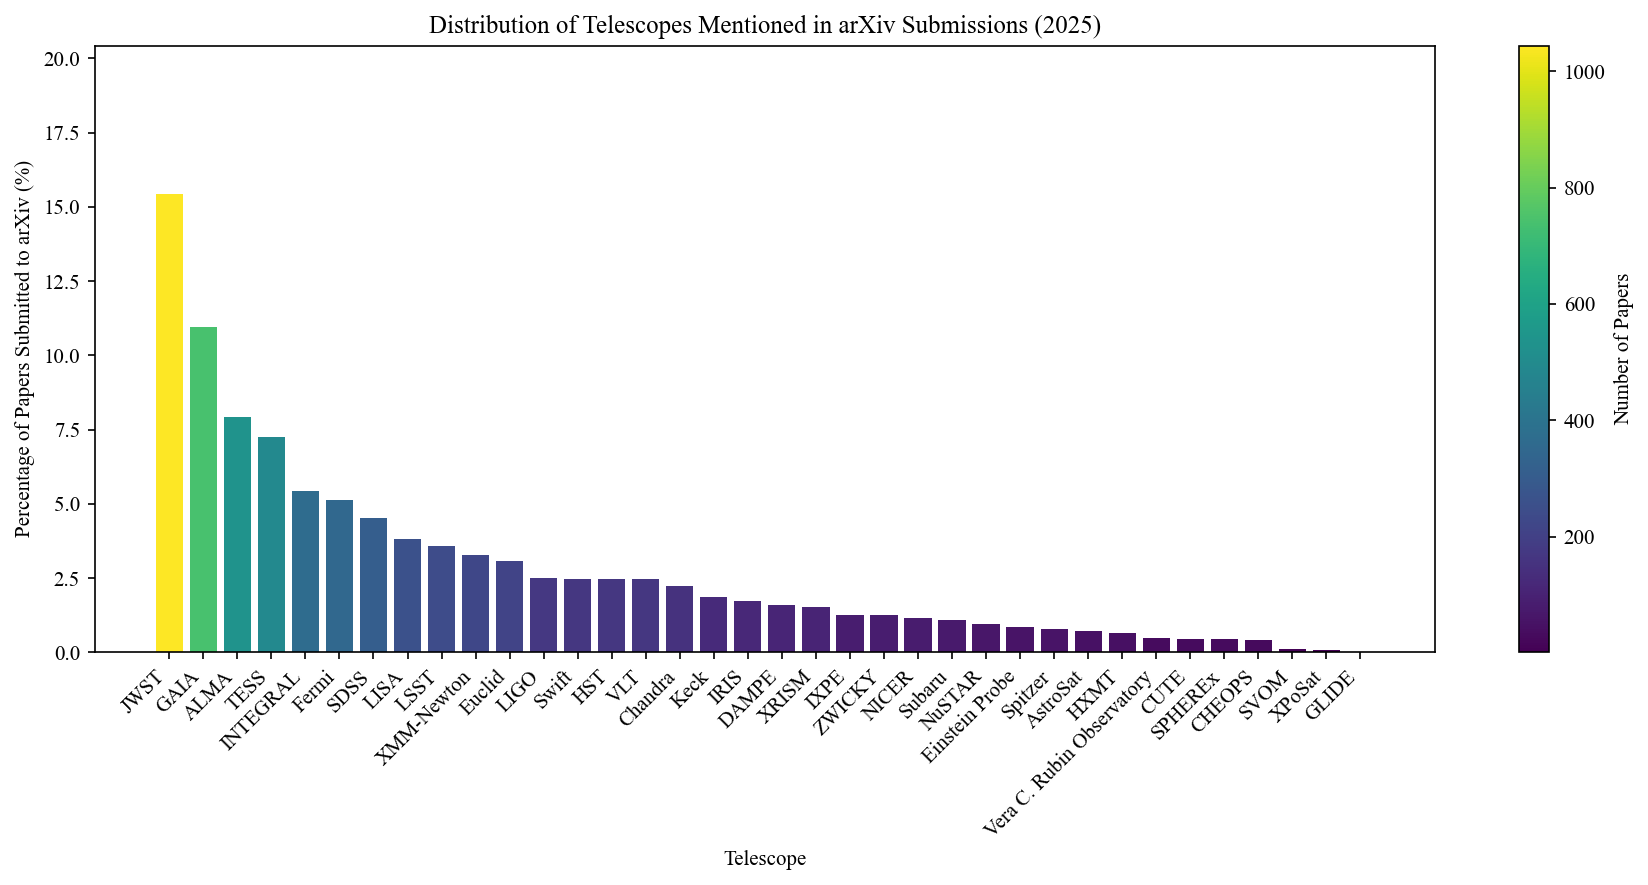

In [9]:
# Calculate counts and percentages
counts = masked_data['telescope'].value_counts()
percentages = (counts / len(masked_data)) * 100

# Create a colormap based on the raw counts
norm = plt.Normalize(counts.min(), counts.max())
colors = plt.cm.viridis(norm(counts.values))

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(counts.index, percentages, color=colors)

# # Overlay the image on the JWST bar
# target_telescope = 'JWST'
# if target_telescope in counts.index:
#     # Get the integer location (x) and height (y)
#     x_loc = counts.index.get_loc(target_telescope)
#     bar_height = percentages[target_telescope]
    
#     # Create an OffsetImage
#     # Adjust 'zoom' to change the size of the image
#     imagebox = OffsetImage(img, zoom=0.2) 
    
#     # Create the AnnotationBbox
#     # xy is the anchor point (center of the bar top)
#     # xybox is the offset in points (0, 10 means 10 points up)
#     ab = AnnotationBbox(imagebox, (x_loc, bar_height),
#                         xybox=(0, 25),
#                         xycoords='data',
#                         boxcoords="offset points",
#                         frameon=False)
#     ax.add_artist(ab)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Telescope')
plt.ylabel('Percentage of Papers Submitted to arXiv (%)')
plt.title('Distribution of Telescopes Mentioned in arXiv Submissions (2025)')
plt.ylim(0, max(percentages) + 5)

# Add a colorbar to indicate the number of papers
sm = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Number of Papers')

plt.tight_layout()
plt.show()

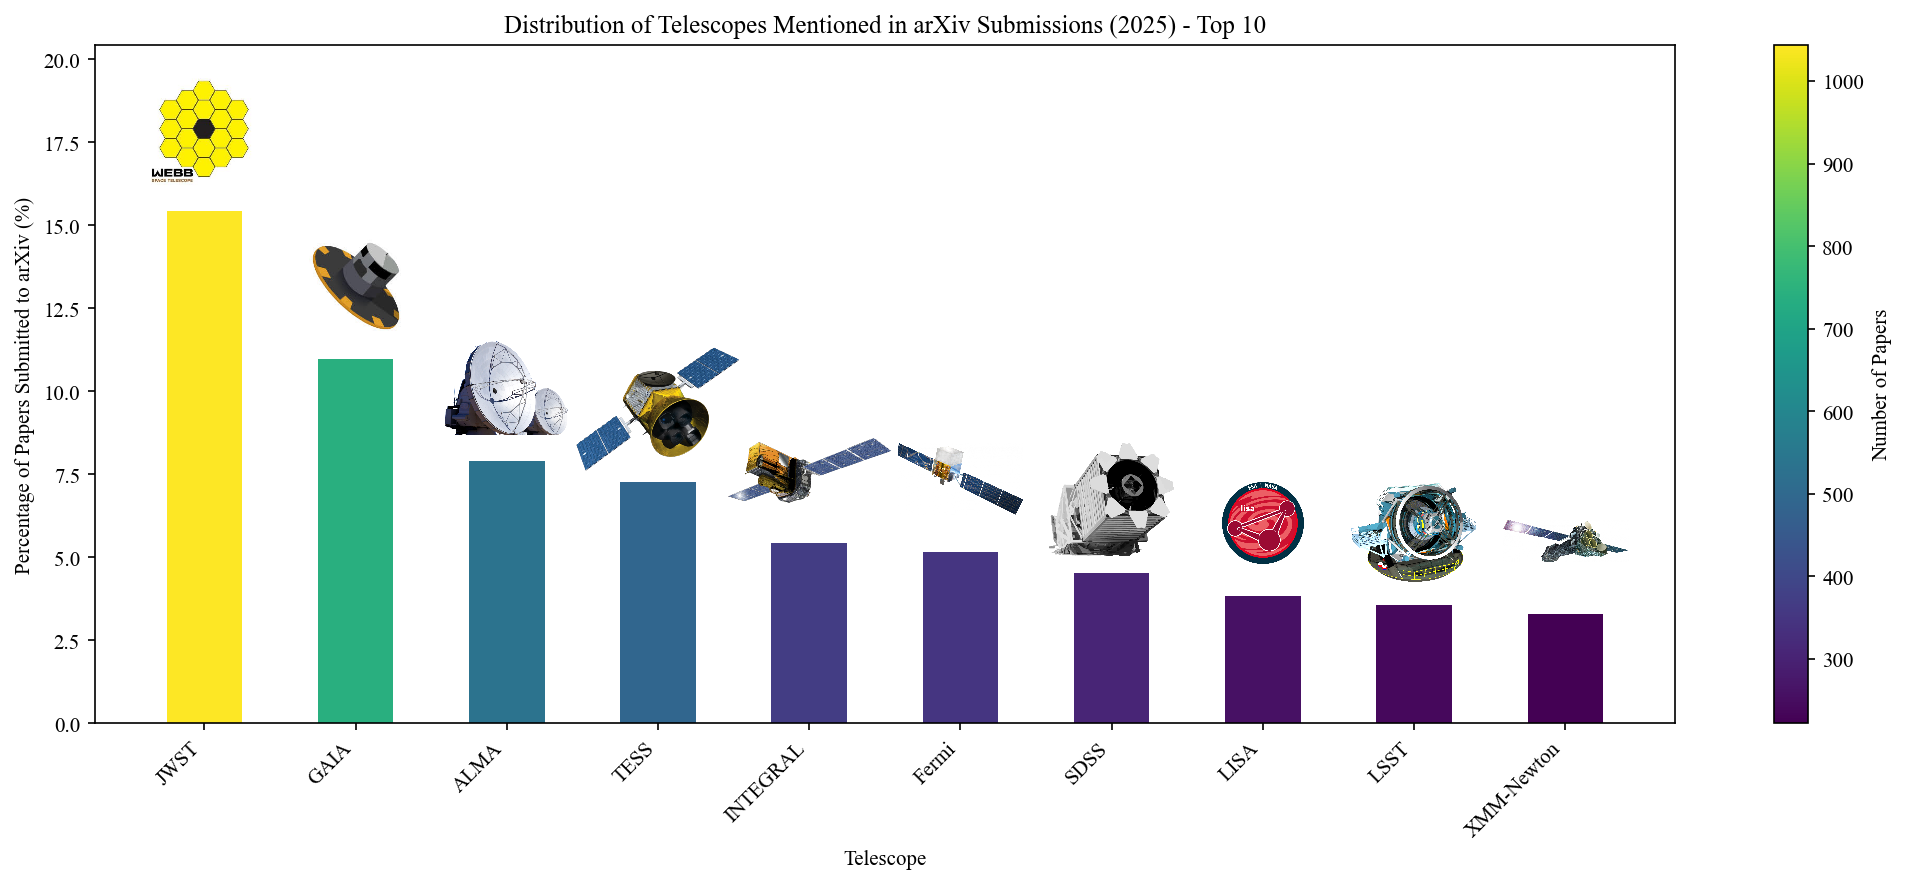

In [8]:
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Calculate counts and percentages
# Limit to top 10
counts = masked_data['telescope'].value_counts().head(10)
percentages = (counts / len(masked_data)) * 100

# Create a colormap based on the raw counts
norm = plt.Normalize(counts.min(), counts.max())
colors = plt.cm.viridis(norm(counts.values))

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
# Increase space between bars by reducing width (default is 0.8)
bars = ax.bar(counts.index, percentages, color=colors, width=0.5)


zoom_list = [0.2, 0.25, 0.09, 0.15, 0.08, 0.02, 0.1, 0.04, 0.03, 0.02]

# Overlay images on the bars
for telescope_name, image_file in image_list.items():
    if telescope_name in counts.index:
        # Get the integer location (x) and height (y)
        x_loc = counts.index.get_loc(telescope_name)
        bar_height = percentages[telescope_name]
        
        # Create an OffsetImage
        # You might need to adjust zoom for each image individually if they have different sizes
        # Using a smaller zoom as default for multiple images
        imagebox = OffsetImage(image_file, zoom=zoom_list[x_loc]) 
        
        # Create the AnnotationBbox
        # xy is the anchor point (center of the bar top)
        # xybox is the offset in points (0, 10 means 10 points up)
        ab = AnnotationBbox(imagebox, (x_loc, bar_height),
                            xybox=(0, 35),
                            xycoords='data',
                            boxcoords="offset points",
                            frameon=False)
        ax.add_artist(ab)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Telescope')
plt.ylabel('Percentage of Papers Submitted to arXiv (%)')
plt.title('Distribution of Telescopes Mentioned in arXiv Submissions (2025) - Top 10')
plt.ylim(0, max(percentages) + 5)

# Add a colorbar to indicate the number of papers
sm = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Number of Papers')

plt.tight_layout()
plt.show()

In [20]:
# Which Telescope data is the most cited per paper
telescope_citations = {}
for telescope in list_of_telescopes:
    telescope_data = masked_data[masked_data['telescope'] == telescope]
    if len(telescope_data) > 0:
        avg_citations = telescope_data['total_citations'].mean()
        telescope_citations[telescope] = avg_citations
sorted_keyword_citations = dict(sorted(telescope_citations.items(), key=lambda item: item[1], reverse=True))
sorted_keyword_citations

{'Einstein Probe': 5.9298245614035086,
 'JWST': 5.431034482758621,
 'SDSS': 4.830618892508143,
 'Keck': 4.365079365079365,
 'LIGO': 4.284023668639053,
 'XRISM': 4.1923076923076925,
 'SPHEREx': 4.166666666666667,
 'DAMPE': 3.8598130841121496,
 'TESS': 3.794297352342159,
 'IRIS': 3.6206896551724137,
 'Euclid': 3.574162679425837,
 'ALMA': 3.2411214953271026,
 'Vera C. Rubin Observatory': 3.090909090909091,
 'HXMT': 2.9555555555555557,
 'VLT': 2.8072289156626504,
 'CUTE': 2.7096774193548385,
 'LISA': 2.4594594594594597,
 'LSST': 2.4190871369294604,
 'NICER': 2.4050632911392404,
 'INTEGRAL': 2.1771117166212535,
 'GLIDE': 2.0,
 'Spitzer': 1.8888888888888888,
 'HST': 1.8855421686746987,
 'ZWICKY': 1.8705882352941177,
 'IXPE': 1.811764705882353,
 'Swift': 1.7951807228915662,
 'GAIA': 1.780323450134771,
 'Subaru': 1.7297297297297298,
 'XMM-Newton': 1.5,
 'CHEOPS': 1.4827586206896552,
 'Chandra': 1.3774834437086092,
 'Fermi': 1.3160919540229885,
 'NuSTAR': 1.2153846153846153,
 'SVOM': 1.0,
 'XPo

In [21]:
# Save as CSV
telescopes_aac = pd.DataFrame(list(sorted_keyword_citations.items()), columns=['Telescope', 'AAC'])
# Round to 2 decimal places
telescopes_aac['AAC'] = telescopes_aac['AAC'].round(2)

In [22]:
# Which Telescope data is the most cited per paper
telescope_citations = {}
for telescope in list_of_telescopes:
    telescope_data = masked_data[masked_data['telescope'] == telescope]
    if len(telescope_data) > 0:
        avg_citations = telescope_data['non_self_citations'].mean()
        telescope_citations[telescope] = avg_citations
sorted_keyword_citations = dict(sorted(telescope_citations.items(), key=lambda item: item[1], reverse=True))
sorted_keyword_citations


{'SDSS': 3.817589576547231,
 'Einstein Probe': 3.6315789473684212,
 'JWST': 3.5593869731800765,
 'SPHEREx': 3.433333333333333,
 'LIGO': 3.2958579881656807,
 'TESS': 3.1710794297352343,
 'Keck': 3.0714285714285716,
 'DAMPE': 2.663551401869159,
 'XRISM': 2.3653846153846154,
 'IRIS': 2.310344827586207,
 'Euclid': 2.1674641148325358,
 'HXMT': 2.0,
 'GLIDE': 2.0,
 'LISA': 1.8687258687258688,
 'VLT': 1.7469879518072289,
 'NICER': 1.7468354430379747,
 'Vera C. Rubin Observatory': 1.6666666666666667,
 'ALMA': 1.6635514018691588,
 'CUTE': 1.6451612903225807,
 'LSST': 1.6141078838174274,
 'Spitzer': 1.3333333333333333,
 'INTEGRAL': 1.3215258855585832,
 'GAIA': 1.2048517520215634,
 'HST': 1.1987951807228916,
 'Swift': 1.1686746987951808,
 'ZWICKY': 1.1647058823529413,
 'XMM-Newton': 1.09009009009009,
 'Subaru': 1.054054054054054,
 'Chandra': 0.9536423841059603,
 'Fermi': 0.9425287356321839,
 'CHEOPS': 0.896551724137931,
 'IXPE': 0.8705882352941177,
 'NuSTAR': 0.7384615384615385,
 'SVOM': 0.625,
 

In [23]:
telescopes_eaac = pd.DataFrame(list(sorted_keyword_citations.items()), columns=['Telescope', 'EAAC'])
# Round to 2 decimal places
telescopes_eaac['EAAC'] = telescopes_eaac['EAAC'].round(2)

In [24]:
# Which Telescope data is the most cited per paper
telescope_citations = {}
for telescope in list_of_telescopes:
    masked_data_2 = masked_data[masked_data['journal_flag'] == 1]
    telescope_data = masked_data_2[masked_data_2['telescope'] == telescope]
    if len(telescope_data) > 0:
        avg_citations = telescope_data['total_citations'].mean()
        telescope_citations[telescope] = avg_citations
sorted_keyword_citations = dict(sorted(telescope_citations.items(), key=lambda item: item[1], reverse=True))
sorted_keyword_citations


{'LIGO': 7.775510204081633,
 'Einstein Probe': 7.314285714285714,
 'SDSS': 6.726744186046512,
 'JWST': 6.205357142857143,
 'IRIS': 4.736111111111111,
 'XRISM': 4.619718309859155,
 'DAMPE': 4.483870967741935,
 'Euclid': 4.225352112676056,
 'HXMT': 4.1,
 'Keck': 4.0,
 'Vera C. Rubin Observatory': 3.8333333333333335,
 'NICER': 3.522727272727273,
 'ALMA': 3.0614525139664805,
 'LSST': 2.9444444444444446,
 'TESS': 2.8721311475409834,
 'VLT': 2.8275862068965516,
 'CUTE': 2.7857142857142856,
 'LISA': 2.6610169491525424,
 'SPHEREx': 2.5833333333333335,
 'INTEGRAL': 2.396039603960396,
 'ZWICKY': 2.3958333333333335,
 'IXPE': 2.156862745098039,
 'Spitzer': 2.142857142857143,
 'HST': 2.1160714285714284,
 'Subaru': 2.0,
 'GLIDE': 2.0,
 'GAIA': 1.9876288659793815,
 'Swift': 1.8476190476190477,
 'NuSTAR': 1.5555555555555556,
 'Chandra': 1.5225225225225225,
 'SVOM': 1.5,
 'Fermi': 1.4886363636363635,
 'CHEOPS': 1.3478260869565217,
 'XMM-Newton': 1.329192546583851,
 'AstroSat': 0.6666666666666666,
 'XPo

In [25]:
telescopes_jac = pd.DataFrame(list(sorted_keyword_citations.items()), columns=['Telescope', 'JAC'])
# Round to 2 decimal places
telescopes_jac['JAC'] = telescopes_jac['JAC'].round(2)

In [26]:
# Which Telescope data is the most cited per paper
telescope_citations = {}
for telescope in list_of_telescopes:
    masked_data_2 = masked_data[masked_data['journal_flag'] == 1]
    telescope_data = masked_data_2[masked_data_2['telescope'] == telescope]
    if len(telescope_data) > 0:
        avg_citations = telescope_data['non_self_citations'].mean()
        telescope_citations[telescope] = avg_citations
sorted_keyword_citations = dict(sorted(telescope_citations.items(), key=lambda item: item[1], reverse=True))
sorted_keyword_citations


{'LIGO': 6.1020408163265305,
 'SDSS': 5.5,
 'Einstein Probe': 4.2,
 'JWST': 4.108928571428572,
 'DAMPE': 3.1774193548387095,
 'IRIS': 3.0416666666666665,
 'Euclid': 2.9859154929577465,
 'Keck': 2.759493670886076,
 'HXMT': 2.7333333333333334,
 'XRISM': 2.5492957746478875,
 'NICER': 2.522727272727273,
 'TESS': 2.3081967213114756,
 'GLIDE': 2.0,
 'LISA': 1.8983050847457628,
 'LSST': 1.8796296296296295,
 'Vera C. Rubin Observatory': 1.7777777777777777,
 'SPHEREx': 1.75,
 'INTEGRAL': 1.7277227722772277,
 'CUTE': 1.7142857142857142,
 'ALMA': 1.7094972067039107,
 'VLT': 1.6896551724137931,
 'Spitzer': 1.4857142857142858,
 'ZWICKY': 1.4166666666666667,
 'GAIA': 1.3670103092783505,
 'HST': 1.2857142857142858,
 'Subaru': 1.275,
 'Swift': 1.1714285714285715,
 'Chandra': 1.054054054054054,
 'Fermi': 1.0454545454545454,
 'SVOM': 1.0,
 'IXPE': 0.9607843137254902,
 'NuSTAR': 0.9555555555555556,
 'XMM-Newton': 0.9006211180124224,
 'CHEOPS': 0.6521739130434783,
 'AstroSat': 0.3611111111111111,
 'XPoSat

In [27]:
telescopes_ejac = pd.DataFrame(list(sorted_keyword_citations.items()), columns=['Telescope', 'EJAC'])
# Round to 2 decimal places
telescopes_ejac['EJAC'] = telescopes_ejac['EJAC'].round(2)

In [28]:
merged_telescopes = telescopes_aac.merge(telescopes_eaac, on='Telescope', how='outer')
merged_telescopes = merged_telescopes.merge(telescopes_jac, on='Telescope', how='outer')
merged_telescopes = merged_telescopes.merge(telescopes_ejac, on='Telescope', how='outer')
merged_telescopes.to_csv('telescope_citation_analysis_2025.csv', index=False)